Saved watermarked image: /mnt/data/watermarked.png
Saved extracted watermark: /mnt/data/extracted_wmark.png


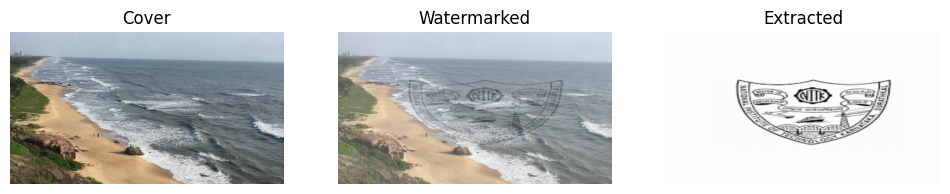

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

cover = r"C:\Users\91800\Downloads\photo4jpg.jpg"       
watermark = r"C:\Users\91800\Downloads\watermark.png"    
out_watermarked = "/mnt/data/watermarked.png"
out_extracted = "/mnt/data/extracted_wmark.png"
alpha = 0.25   

C = cv2.imread(cover, cv2.IMREAD_COLOR)
if C is None:
    raise FileNotFoundError("Cover image not found at: "+cover)
W = cv2.imread(watermark, cv2.IMREAD_COLOR)
if W is None:
    raise FileNotFoundError("Watermark image not found at: "+watermark)
W_resized = cv2.resize(W, (C.shape[1], C.shape[0]))  # match sizes

watermarked = cv2.addWeighted(W_resized.astype(np.float32), alpha,
                              C.astype(np.float32), 1.0 - alpha, 0.0)
watermarked = np.clip(watermarked, 0, 255).astype(np.uint8)
cv2.imwrite(out_watermarked, watermarked)
print("Saved watermarked image:", out_watermarked)

extracted = (watermarked.astype(np.float32) - (1.0 - alpha) * C.astype(np.float32)) / (alpha + 1e-9)
extracted = np.clip(extracted, 0, 255).astype(np.uint8)
cv2.imwrite(out_extracted, extracted)
print("Saved extracted watermark:", out_extracted)

fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(cv2.cvtColor(C, cv2.COLOR_BGR2RGB)); ax[0].set_title("Cover"); ax[0].axis("off")
ax[1].imshow(cv2.cvtColor(watermarked, cv2.COLOR_BGR2RGB)); ax[1].set_title("Watermarked"); ax[1].axis("off")
ax[2].imshow(cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB)); ax[2].set_title("Extracted"); ax[2].axis("off")
plt.show()
